# Analisando os Dados - IBOVESPA


## Regressão Linear - Série Temporal

 - Período - Jan/2024 | Jan/2025

### 📌 Introdução / Objetivo do Projeto

 - Desenvolver um modelo preditivo com dados históricos da IBOVESPA para prever diariamente o valor de fechamento do índice, utilizando técnicas de séries temporais e aprendizado de máquina, a fim de apoiar a equipe de investimentos na tomada de decisões estratégicas.

 - A variável target será a coluna "Último", correspondente ao valor de fechamento diário do índice IBOVESPA, utilizada como referência para modelagem e previsão na série temporal.

 - O modelo de regressão é eficiente para prever valores porque ele é projetado especificamente para estimar relações entre variáveis numéricas contínuas. Em problemas de previsão, como no caso do fechamento diário da IBOVESPA, o objetivo é estimar um valor numérico futuro com base em padrões históricos.

### 📁 Importação das Bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from functions import table_info

### 📊 Carregamento dos Dados

In [6]:
data = pd.read_csv(r'C:\Users\Usuario\Downloads\FIAP-tech-challenge-2\raw-data\Dados Históricos - Ibovespa.csv', index_col='Data')

In [7]:
table_info(data)

🔹 Dimensões do DataFrame: (4745, 6)

🔹 Tipos de dados:
Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.         object
Var%         object
dtype: object

🔹 Valores nulos por coluna:
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

🔹 Valores únicos por coluna:
Último      4590
Abertura    4583
Máxima      4575
Mínima      4582
Vol.        1727
Var%         795
dtype: int64

🔹 Exemplos de valores por coluna:
Data     27.02.2025 26.02.2025 25.02.2025
Último      124.799    124.769     125.98
Abertura    124.768     125.98    125.401
Máxima      125.497    126.563    126.718
Mínima      124.352    124.732    125.382
Vol.         12,55B     11,36B     11,08B
Var%          0,02%     -0,96%      0,46%

🔹 Descrição dos dados:
            Último     Abertura       Máxima       Mínima
count  4745.000000  4745.000000  4745.000000  4745.000000
mean     74.965063    74.946324    75.661524    74.237798
std      28.1

### 🧹 4. Pré-processamento dos Dados

In [8]:
data.dropna(inplace=True)
data.drop(['Vol.', 'Var%'], axis=1, inplace=True)

In [9]:
data.index = pd.to_datetime(data.index, format='%d.%m.%Y')

In [10]:
data = data.sort_index() 
data = data.loc['01/01/2024':'31/01/2025']

In [11]:
data.head()

,Último,Abertura,Máxima,Mínima
Data,,,,
2024-01-02,132.697,134.186,134.195,132.095
2024-01-03,132.834,132.697,133.576,132.250
2024-01-04,131.226,132.831,132.885,131.024
2024-01-05,132.023,131.218,132.635,130.579
2024-01-08,132.427,132.023,132.498,131.015


### 🔍 5. Análise Exploratória dos Dados (EDA)

Text(0.5, 1.0, 'Análise das médias')

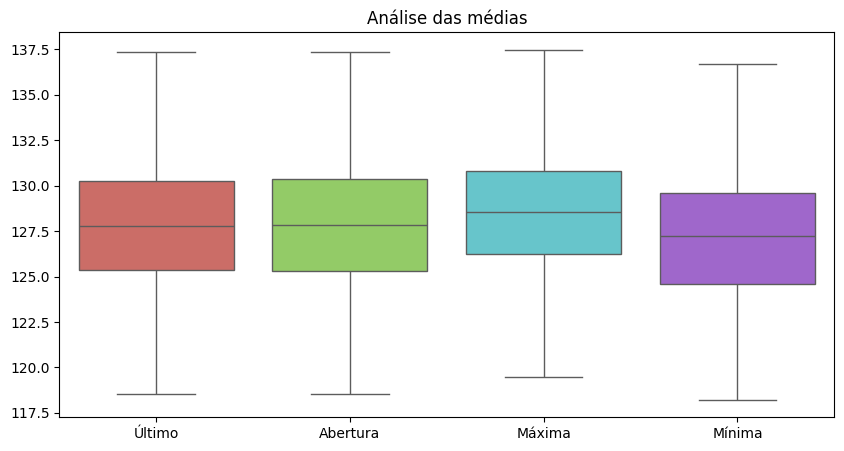

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=data, palette='hls')
plt.title("Análise das médias")


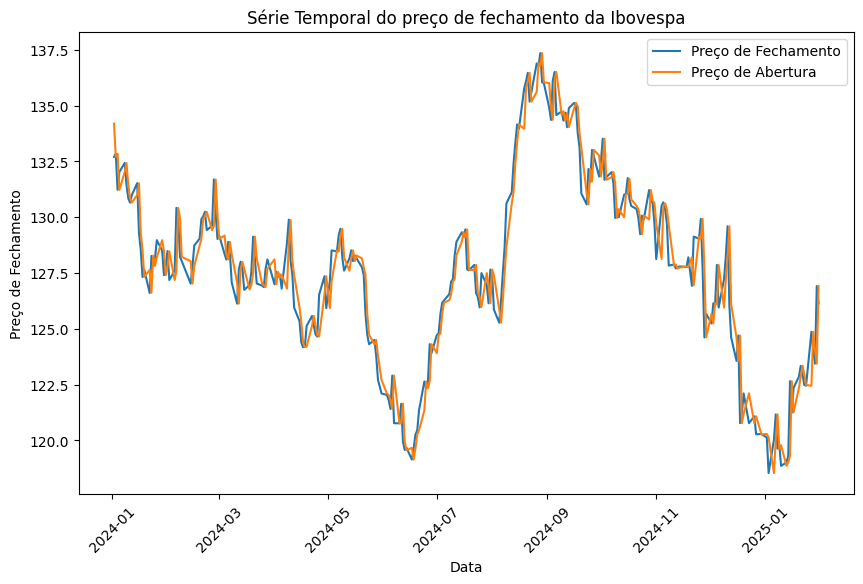

In [13]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})


plt.plot(data['Último'], label='Preço de Fechamento')
plt.plot(data['Abertura'], label='Preço de Abertura')
plt.title('Série Temporal do preço de fechamento da Ibovespa')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

### ✂️ 6. Divisão em Conjunto de Treino e Teste

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
features = ['Abertura', 'Máxima', 'Mínima']
X = data[features]
y = data['Último']

### 🤖 7. Modelagem (Regressão)

In [16]:
split_point = int(len(data) * 0.8)

X_train = X.iloc[:split_point]
X_test  = X.iloc[split_point:]

y_train = y.iloc[:split_point]
y_test  = y.iloc[split_point:]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE - Erro Absoluto Médio:',MAE)
print('MSE - Erro Quadrático Médio:',MSE)
print(f'R²: {r2:.4f}')


MAE - Erro Absoluto Médio: 0.3343643437717754
MSE - Erro Quadrático Médio: 0.16206096825384084
R²: 0.9899


### 🧪 8. Avaliação e Interpretação dos Resultados

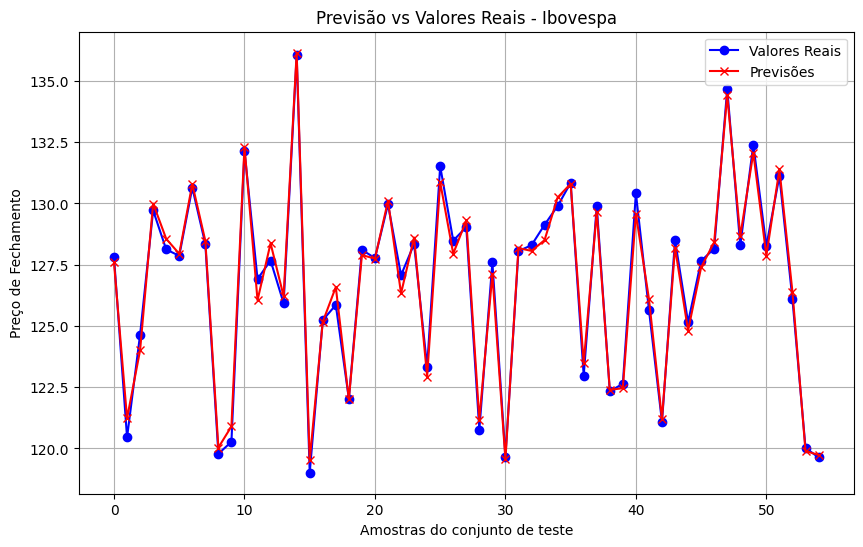

In [18]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})

plt.plot(y_test.values, label='Valores Reais', color='blue', marker='o')
plt.plot(y_pred, label='Previsões', color='red', marker='x')
plt.title('Previsão vs Valores Reais - Ibovespa')
plt.xlabel('Amostras do conjunto de teste')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

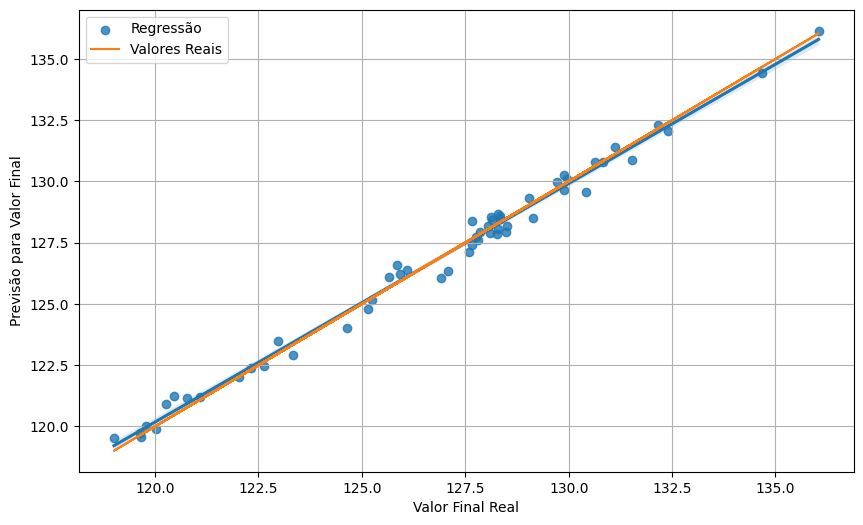

In [19]:
fig = plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})

ax = sns.regplot(x=y_test, y=y_pred, label='Regressão')
plt.plot(y_test, y_test, label='Valores Reais')
plt.xlabel('Valor Final Real')
plt.ylabel('Previsão para Valor Final')
plt.grid(True)
plt.legend()

plt.show()

In [20]:
ultima_data = data.index.max()
proximo_mes = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=30, freq='D')

simulacao_features = {
    'Abertura': data['Abertura'].rolling(window=7).mean().iloc[-1],
    'Máxima': data['Máxima'].rolling(window=7).mean().iloc[-1],
    'Mínima': data['Mínima'].rolling(window=7).mean().iloc[-1]}

dados_proximo_mes = pd.DataFrame(index=proximo_mes, columns=features)
for coluna in features:
        dados_proximo_mes[coluna] = simulacao_features[coluna]

np.random.seed(42)
dados_proximo_mes += np.random.normal(0, 0.01, size=dados_proximo_mes.shape)

In [21]:
previsoes_proximo_mes = model.predict(dados_proximo_mes)
dados_proximo_mes['Fechamento'] = previsoes_proximo_mes

print(dados_proximo_mes[['Fechamento']].head())

            Fechamento
2025-02-01  124.401935
2025-02-02  124.388784
2025-02-03  124.393186
2025-02-04  124.390275
2025-02-05  124.371684


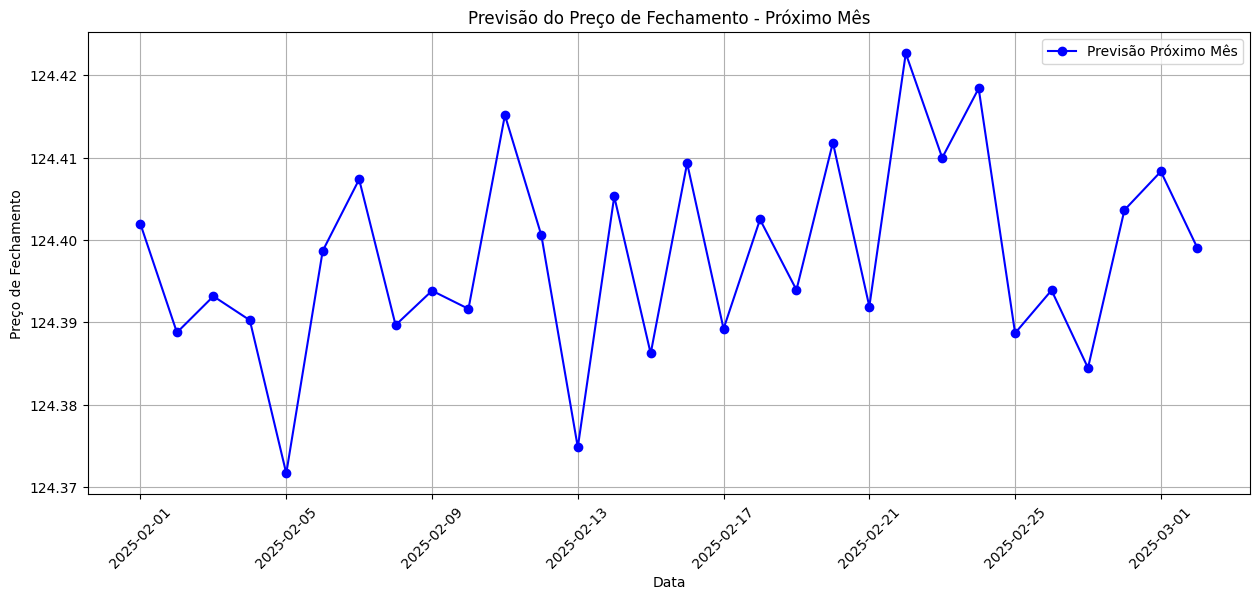

In [22]:
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 10})

plt.plot(dados_proximo_mes.index, dados_proximo_mes['Fechamento'], label='Previsão Próximo Mês', color='blue', marker='o')
plt.title('Previsão do Preço de Fechamento - Próximo Mês')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

Text(0.5, 0, "Q's")

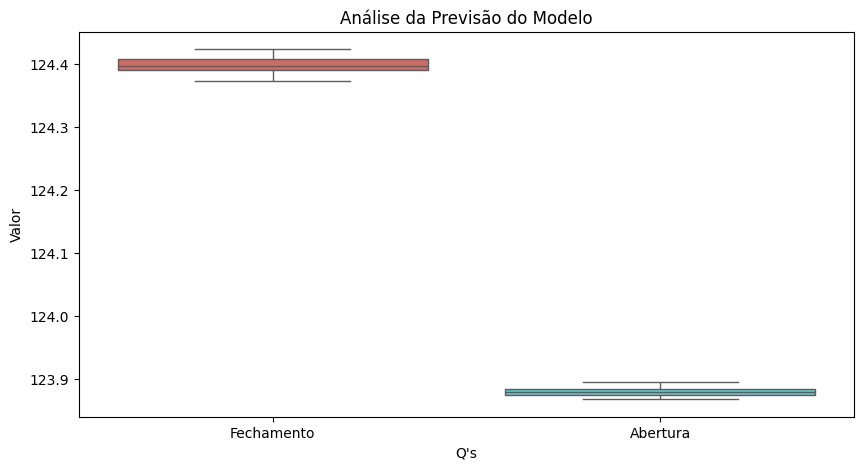

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=dados_proximo_mes[['Fechamento', 'Abertura']], palette='hls')
plt.title("Análise da Previsão do Modelo")
plt.ylabel("Valor")
plt.xlabel("Q's")

In [24]:
dados_proximo_mes.head()

,Abertura,Máxima,Mínima,Fechamento
2025-02-01,123.884253,125.152474,123.335334,124.401935
2025-02-02,123.894516,125.151516,123.326516,124.388784
2025-02-03,123.895078,125.161531,123.324162,124.393186
2025-02-04,123.884711,125.149223,123.324200,124.390275
2025-02-05,123.881705,125.134724,123.311608,124.371684


### 🚀 9. Conclusão

**A análise foi conduzida sobre um período de 1 ano (Jan/2024, Jan/2025), caracterizado por relativa estabilidade no índice Ibovespa, sem grandes oscilações. Nesse intervalo, o modelo de regressão linear aplicado à série temporal apresentou um desempenho altamente satisfatório, alcançando um coeficiente de determinação (R²) de 98,9%. Esse resultado indica que o modelo possui excelente capacidade explicativa, sendo eficaz na previsão dos valores de fechamento do índice durante períodos de baixa volatilidade.**

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Regressão Linear - Série Temporal

 - Período - Jan/2022 | Jan/2023

### 📊 Carregamento dos Dados

In [25]:
dados_e= pd.read_csv(r'C:\Users\Usuario\Downloads\FIAP-tech-challenge-2\raw-data\Dados Históricos - Ibovespa.csv', index_col='Data')

In [26]:
table_info(dados_e)

🔹 Dimensões do DataFrame: (4745, 6)

🔹 Tipos de dados:
Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.         object
Var%         object
dtype: object

🔹 Valores nulos por coluna:
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

🔹 Valores únicos por coluna:
Último      4590
Abertura    4583
Máxima      4575
Mínima      4582
Vol.        1727
Var%         795
dtype: int64

🔹 Exemplos de valores por coluna:
Data     27.02.2025 26.02.2025 25.02.2025
Último      124.799    124.769     125.98
Abertura    124.768     125.98    125.401
Máxima      125.497    126.563    126.718
Mínima      124.352    124.732    125.382
Vol.         12,55B     11,36B     11,08B
Var%          0,02%     -0,96%      0,46%

🔹 Descrição dos dados:
            Último     Abertura       Máxima       Mínima
count  4745.000000  4745.000000  4745.000000  4745.000000
mean     74.965063    74.946324    75.661524    74.237798
std      28.1

### 🧹 4. Pré-processamento dos Dados

In [27]:
dados_e.dropna(inplace=True)
dados_e.drop(['Vol.', 'Var%'], axis=1, inplace=True)

In [28]:
dados_e.index = pd.to_datetime(dados_e.index, format='%d.%m.%Y')

In [29]:
dados_e.sort_index(inplace=True)
dados_e = dados_e.loc['01/01/2022':'01/01/2023']


In [30]:
dados_e.head()

,Último,Abertura,Máxima,Mínima
Data,,,,
2022-01-03,103.922,104.823,106.125,103.413
2022-01-04,103.514,103.922,104.276,103.096
2022-01-05,101.006,103.514,103.514,100.850
2022-01-06,101.561,101.006,102.235,101.000
2022-01-07,102.719,101.561,102.719,101.104


### 🔍 5. Análise Exploratória dos Dados (EDA)

Text(0.5, 1.0, 'Análise das médias')

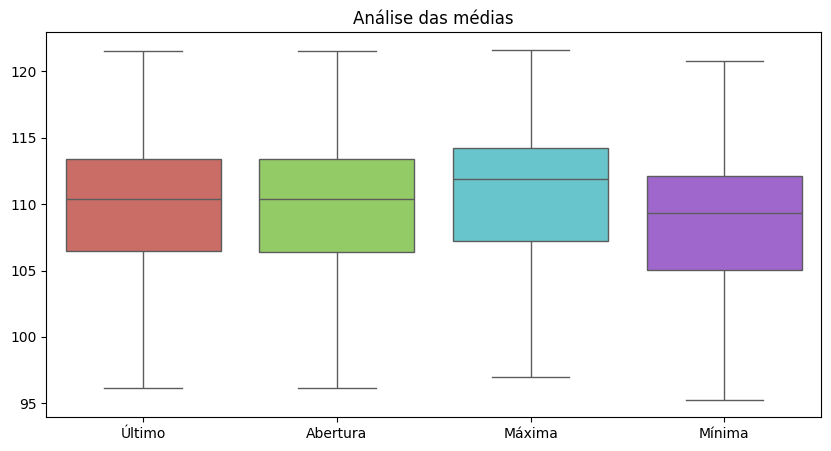

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=dados_e, palette='hls')
plt.title("Análise das médias")

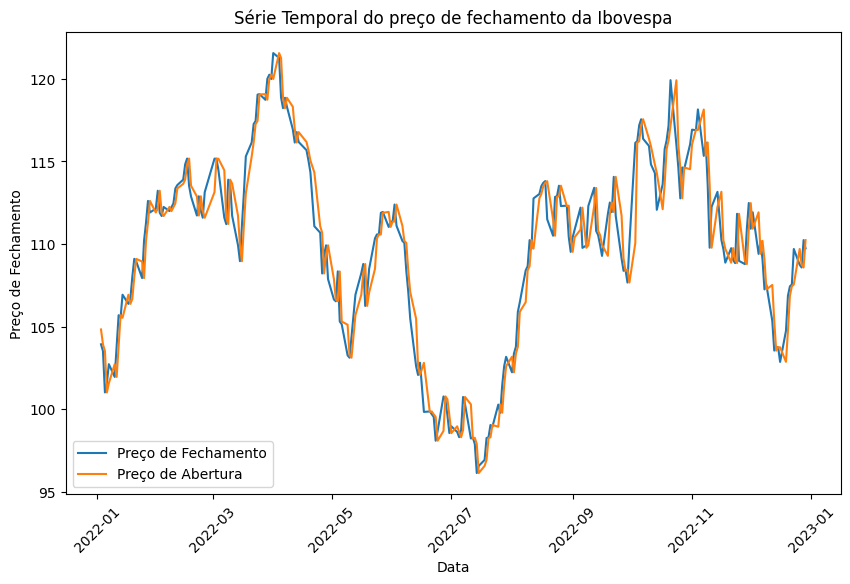

In [32]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})


plt.plot(dados_e['Último'], label='Preço de Fechamento')
plt.plot(dados_e['Abertura'], label='Preço de Abertura')
plt.title('Série Temporal do preço de fechamento da Ibovespa')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

### ✂️ 6. Divisão em Conjunto de Treino e Teste

In [33]:
features = ['Abertura', 'Máxima', 'Mínima']
X = dados_e[features]
y = dados_e['Último']

### 🤖 7. Modelagem (Regressão)

In [34]:
split_point = int(len(data) * 0.8)

X_train = X.iloc[:split_point]
X_test  = X.iloc[split_point:]

y_train = y.iloc[:split_point]
y_test  = y.iloc[split_point:]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE - Erro Absoluto Médio:',MAE)
print('MSE - Erro Quadrático Médio:',MSE)
print(f'R²: {r2:.4f}')

MAE - Erro Absoluto Médio: 0.440769625588519
MSE - Erro Quadrático Médio: 0.3573403953794754
R²: 0.9871


### 🧪 8. Avaliação e Interpretação dos Resultados

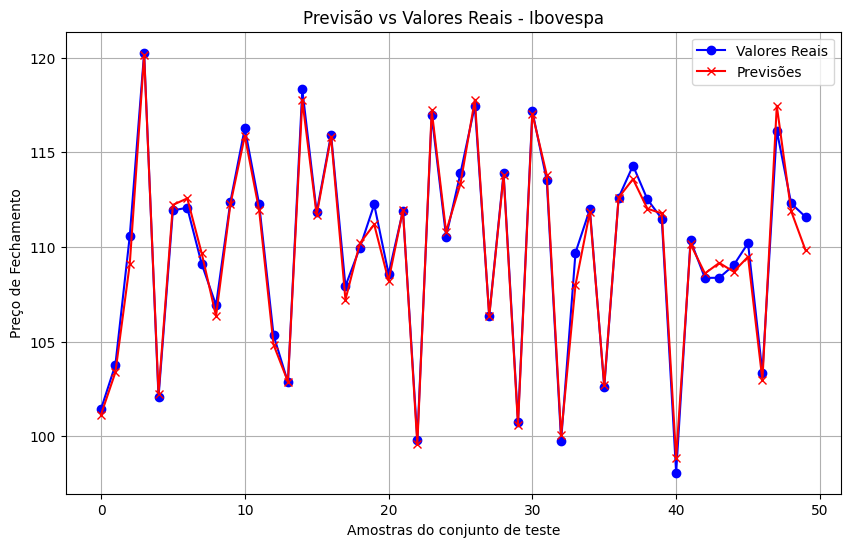

In [36]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})

plt.plot(y_test.values, label='Valores Reais', color='blue', marker='o')
plt.plot(y_pred, label='Previsões', color='red', marker='x')
plt.title('Previsão vs Valores Reais - Ibovespa')
plt.xlabel('Amostras do conjunto de teste')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

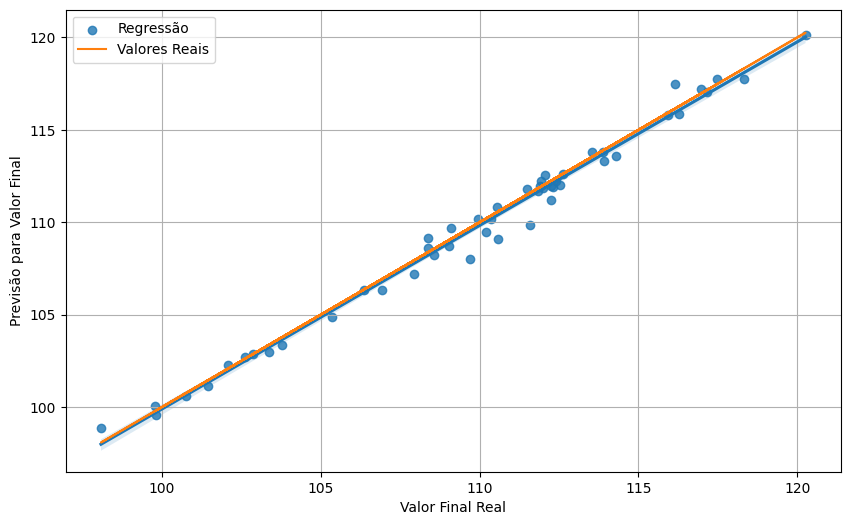

In [37]:
fig = plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})

ax = sns.regplot(x=y_test, y=y_pred, label='Regressão')
plt.plot(y_test, y_test, label='Valores Reais')
plt.xlabel('Valor Final Real')
plt.ylabel('Previsão para Valor Final')
plt.grid(True)
plt.legend()

plt.show()

In [38]:
ultima_data = dados_e.index.max()
proximo_mes = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=30, freq='D')

simulacao_features = {
    'Abertura': dados_e['Abertura'].rolling(window=7).mean().iloc[-1],
    'Máxima': dados_e['Máxima'].rolling(window=7).mean().iloc[-1],
    'Mínima': dados_e['Mínima'].rolling(window=7).mean().iloc[-1]}

dados_proximo_mes = pd.DataFrame(index=proximo_mes, columns=features)
for coluna in features:
        dados_proximo_mes[coluna] = simulacao_features[coluna]

np.random.seed(42)
dados_proximo_mes += np.random.normal(0, 0.01, size=dados_proximo_mes.shape)

In [39]:
previsoes_proximo_mes = model.predict(dados_proximo_mes)
dados_proximo_mes['Fechamento'] = previsoes_proximo_mes

print(dados_proximo_mes[['Fechamento']].head())

            Fechamento
2022-12-30  108.780598
2022-12-31  108.768013
2023-01-01  108.773521
2023-01-02  108.769576
2023-01-03  108.750751


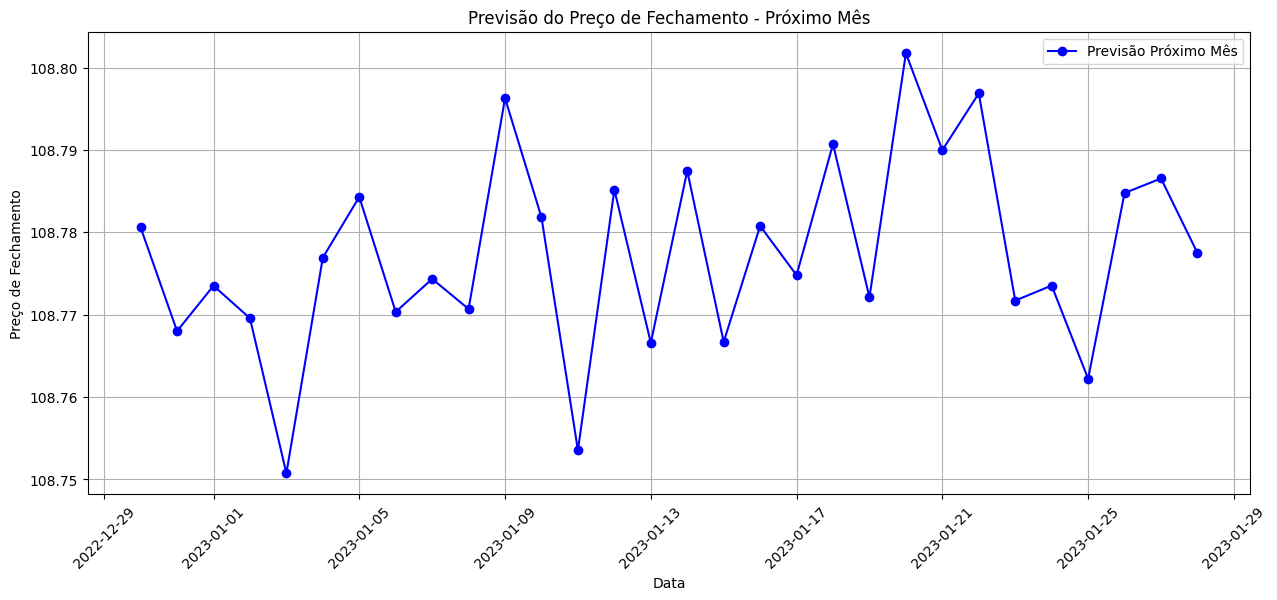

In [40]:
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 10})

plt.plot(dados_proximo_mes.index, dados_proximo_mes['Fechamento'], label='Previsão Próximo Mês', color='blue', marker='o')
plt.title('Previsão do Preço de Fechamento - Próximo Mês')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

Text(0.5, 0, "Q's")

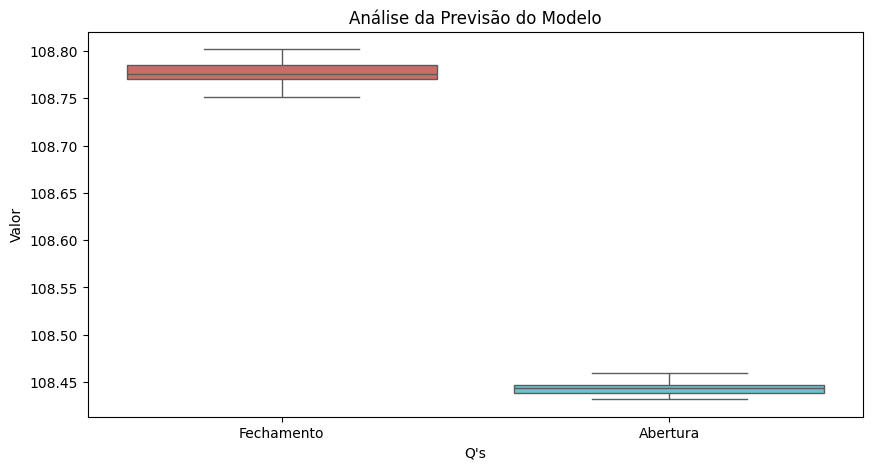

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=dados_proximo_mes[['Fechamento', 'Abertura']], palette='hls')
plt.title("Análise da Previsão do Modelo")
plt.ylabel("Valor")
plt.xlabel("Q's")

In [42]:
dados_proximo_mes.head()

,Abertura,Máxima,Mínima,Fechamento
2022-12-30,108.448824,109.597189,107.719763,108.780598
2022-12-31,108.459087,109.596230,107.710944,108.768013
2023-01-01,108.459649,109.606246,107.708591,108.773521
2023-01-02,108.449283,109.593937,107.708628,108.769576
2023-01-03,108.446277,109.579439,107.696037,108.750751


### 🚀 9. Conclusão

**A análise foi conduzida sobre um período de 1 ano (Jan/2022, Jan/2023), marcado pelo contexto eleitoral, que gerou alta volatilidade no mercado financeiro. Nesse intervalo, o modelo de regressão linear aplicado à série temporal apresentou um desempenho altamente satisfatório, alcançando um coeficiente de determinação (R²) de 98,7%. Esse resultado indica que, mesmo em um cenário de oscilações significativas, o modelo demonstrou excelente precisão na previsão dos valores de fechamento do índice.**

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------